In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: >

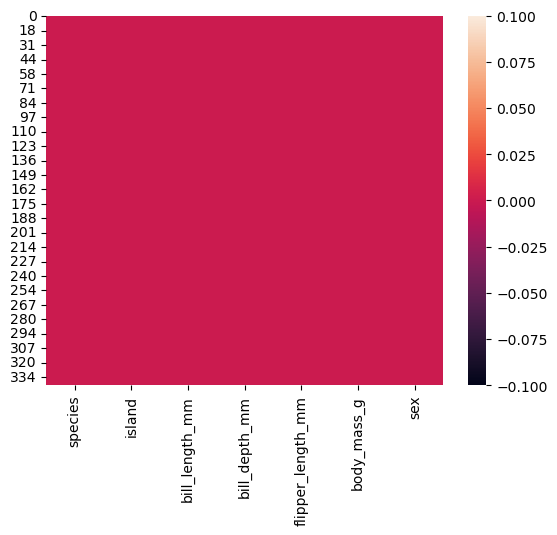

In [10]:
sns.heatmap(df.isnull())

# One hot Encoding transforming categorical data to numeric


# Feature Engineering

In [11]:
df.sex.unique()


array(['Male', 'Female'], dtype=object)

In [12]:
pd.get_dummies(df['sex']).head()

,Female,Male
0,0,1
1,1,0
2,1,0
4,1,0
5,0,1


In [14]:
sex=pd.get_dummies(df['sex'],drop_first=True)
sex.head()

,Male
0,1
1,0
2,0
4,0
5,1


In [17]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [18]:
island=pd.get_dummies(df['island'],drop_first=True)
island.head()

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1



# concatenation

In [19]:
new_data=pd.concat([df,island,sex],axis=1)

In [20]:
new_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen,Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1,1


In [21]:
new_data.drop(['island','sex'],axis=1,inplace=True)

In [22]:
y=new_data.species

In [23]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [25]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [26]:
y.map({'Adelie':0,'Chinstrap':1,'Gentoo':2})

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int64

In [27]:
new_data.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,Male
0,Adelie,39.1,18.7,181.0,3750.0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,1,1


In [28]:
new_data.drop('species',inplace=True,axis=1)

In [29]:
new_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,Male
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(new_data,y,test_size=0.3,random_state=0)

# Training Random forest Classification on training set

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=12,criterion='gini',random_state=0)

In [54]:
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=12, random_state=0)

In [55]:
y_predict=classifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

In [57]:
confusion_matrix(y_predict,y_test)

array([[48,  2,  0],
       [ 0, 14,  0],
       [ 0,  0, 36]])

In [58]:
classification_report(y_predict,y_test)

'              precision    recall  f1-score   support\n\n      Adelie       1.00      0.96      0.98        50\n   Chinstrap       0.88      1.00      0.93        14\n      Gentoo       1.00      1.00      1.00        36\n\n    accuracy                           0.98       100\n   macro avg       0.96      0.99      0.97       100\nweighted avg       0.98      0.98      0.98       100\n'

In [59]:
accuracy_score(y_predict,y_test)

0.98